In [33]:
import pandas as pd

In [35]:
df = pd.read_csv("results/llm summary output - human eval.csv")
df = df[:50]

In [36]:
all_winners = df.dropna(subset = ['winner'])["winner"].to_list()
",".join(all_winners)

'1,1,3,2,2,3,2,3,1,2,3,1,2,2,3,1,2,3,3,2,2,3,2,2,3,2,3,2,2,3,1,2,2,3,1,3,3,2,3,1,2,3,3,2,1,2,3,2,3,3,3,1,1,2,2,3,2,3,2,3,3,2,3,3,3,3,2,3,3,3,2,3,2,3,1,2,3,2,3'

In [37]:
models = ["1", "2", "3", "4"]
res = []

for model in models:
    res.append({model : all_winners.count(model)})


In [38]:
res

[{'1': 3}, {'2': 8}, {'3': 13}, {'4': 0}]

In [39]:
import json

with open("model_to_uuid_map.json", "r") as file:
    model_map = json.load(file)

model_map

new_model_map = dict()

for i, key in enumerate(model_map.keys()):
    new_model_map[key] = str(i+1)

new_model_map
list(new_model_map.keys())

['summary_by_SmolLM2-1.7B-Instruct',
 'summary_by_SmolLM2-1.7B-Instruct-summarizer',
 'summary_by_SmolLM2-360M-Instruct-summarizer',
 'summary_by_SmolLM2-360M-Instruct']

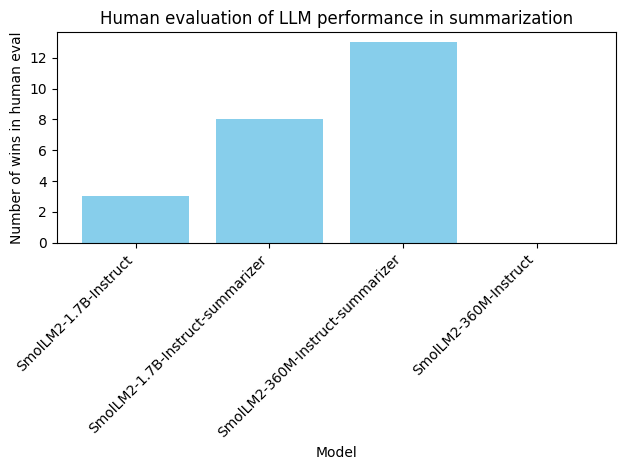

In [41]:
import matplotlib.pyplot as plt

# Given list
data = res

# Extract keys and values
labels = [list(new_model_map.keys())]# [list(d.keys())[0] for d in data]
labels = [i.split("summary_by_")[-1] for i in list(new_model_map.keys())]
values = [list(d.values())[0] for d in data]

# Create bar chart
plt.bar(labels, values, color='skyblue')

# Labels and title
plt.xlabel("Model")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for readability
plt.ylabel("Number of wins in human eval")
plt.title("Human evaluation of LLM performance in summarization")
plt.tight_layout()
plt.savefig("human_evaluation_wins.png")
# Show the plot
plt.show()


In [19]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("../llm_summary_entities.csv")

In [20]:
hallucination_counts = df.groupby(["model"])["num_hallucinated_entities"].sum()

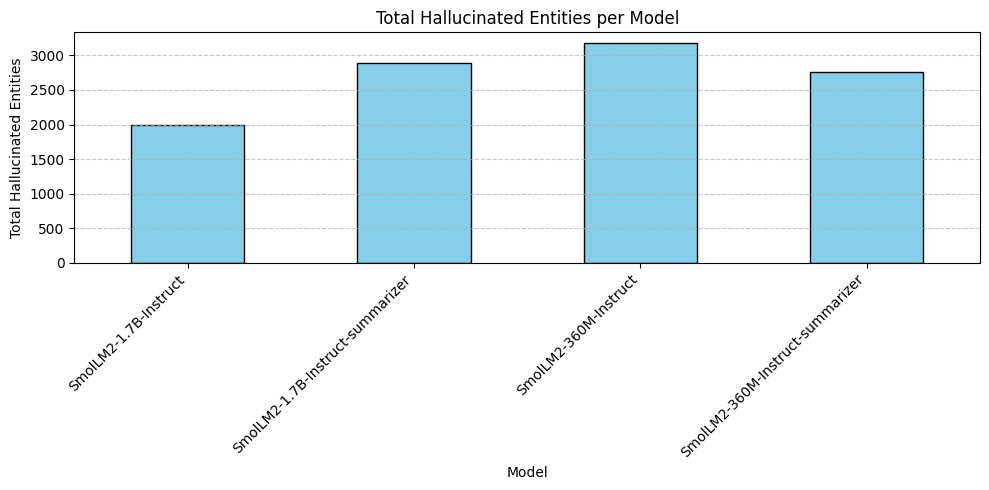

In [26]:
# Plot
plt.figure(figsize=(10, 5))
hallucination_counts.plot(kind="bar", color="skyblue", edgecolor="black")

# Labels and title
plt.xlabel("Model")
plt.ylabel("Total Hallucinated Entities")
plt.title("Total Hallucinated Entities per Model")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for readability
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Add horizontal grid lines
plt.tight_layout()
plt.savefig("barplot_hallucination.png")
# Show plot
plt.show()

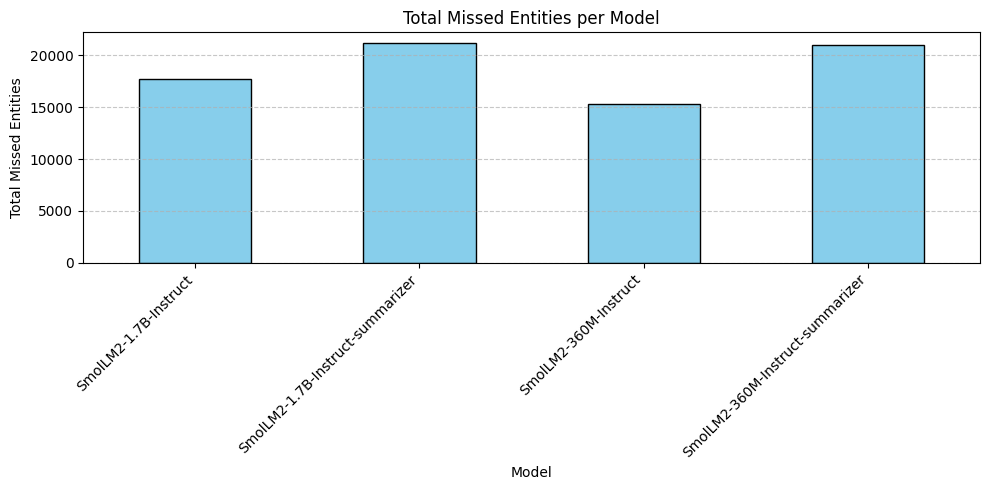

In [27]:
# Plot
missed_counts = df.groupby(["model"])["num_missed_entities"].sum()
plt.figure(figsize=(10, 5))
missed_counts.plot(kind="bar", color="skyblue", edgecolor="black")

# Labels and title
plt.xlabel("Model")
plt.ylabel("Total Missed Entities")
plt.title("Total Missed Entities per Model")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for readability
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Add horizontal grid lines
plt.tight_layout()
plt.savefig("barplot_missed_entities.png")
# Show plot
plt.show()